# Day 08. Exercise 00
# Binary classifier. Logistic regression

## 0. Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Preprocessing

- Get the data from the file [`checker-timestamp.csv`](https://drive.google.com/file/d/1pooM4cITtG249msX3GK_6W0eEiblzAf5/view?usp=sharing).


- Create a dataframe `df` with the columns: `date`, `am`, `pm`, `target`, where `date` is the date of the day, `am` is the number of the commits during the day before midday (integer), `pm` is the number of commits during the day after midday (integer), `target` is weekend/working_day.

In [5]:
# считываем данные
data = pd.read_csv('data/checker_timestamp.csv')
data.head()

,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  3207 non-null   object
dtypes: object(1)
memory usage: 25.2+ KB


In [7]:
# преобразуем timestamp в тип datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  3207 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 25.2 KB


In [8]:
# создаем столбцы с датами и часами
data['date'] = data['timestamp'].dt.date
data['hour'] = data['timestamp'].dt.hour

#группируем по дате подсчитывем кол-во коммитов для каждого часа
data = data.groupby('date').value_counts().reset_index(name='count')

# создаем колонки am  hour < 12 и pm hour >=12
data['am'] = data['count'].where(data['hour'] < 12, 0)
data['pm'] = data['count'].where(data['hour'] >= 12, 0)

# группируем по дате суммируя кол-во коммитов
df = data.groupby('date')[['am', 'pm']].sum()
df.reset_index(inplace=True)
df.head(10)

,date,am,pm
0,2020-04-17,21,2
1,2020-04-18,1,68
2,2020-04-19,18,15
3,2020-04-20,2,23
4,2020-04-21,0,25
5,2020-04-22,0,28
6,2020-04-23,10,33
7,2020-04-24,2,14
8,2020-04-25,30,74
9,2020-04-26,28,233


In [9]:
# создаем колонку с целевой переменной
# делаем таргет бинарным 1 - рабочий день, 0 - выходной
df['date'] = pd.to_datetime(df['date'])
df['target'] = df['date'].dt.dayofweek.apply(lambda x: 0 if x in [5,6] else 1)
df.head(10)

,date,am,pm,target
0,2020-04-17,21,2,1
1,2020-04-18,1,68,0
2,2020-04-19,18,15,0
3,2020-04-20,2,23,1
4,2020-04-21,0,25,1
5,2020-04-22,0,28,1
6,2020-04-23,10,33,1
7,2020-04-24,2,14,1
8,2020-04-25,30,74,0
9,2020-04-26,28,233,0


## 2. Exploratory analysis

- Create a plot where `x` is am, `y` is pm, each dot is a day, working days and weekends must have different colors.


- By looking at the graph do you think it will be easy to classify the days having those two features? Put your answer in the markdown cell in the end of that sectioin: "yes, it is easy" or "no, it is not easy".

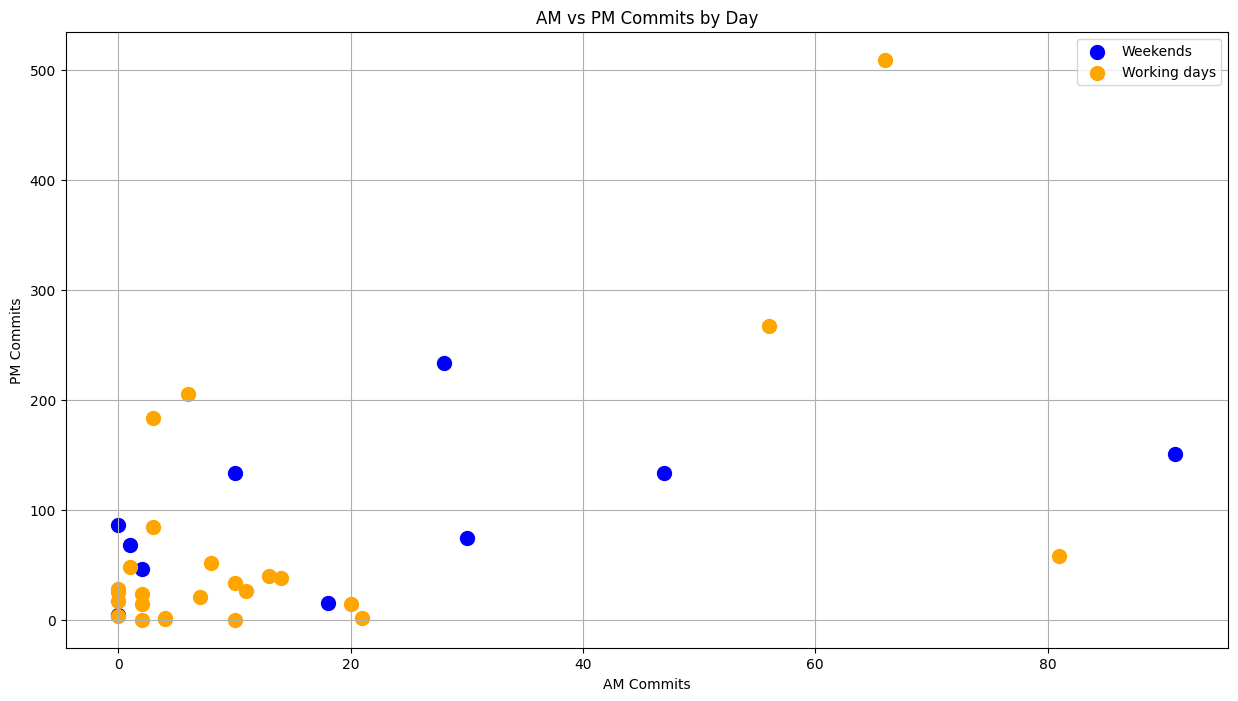

In [10]:
plt.figure(figsize=(15, 8))

plt.scatter(df[df['target'] == 0]['am'], df[df['target'] == 0]['pm'], color='blue', label='Weekends', s=100)
plt.scatter(df[df['target'] == 1]['am'], df[df['target'] == 1]['pm'], color='orange', label='Working days', s=100)
# Adding labels and title
plt.title('AM vs PM Commits by Day')
plt.xlabel('AM Commits')
plt.ylabel('PM Commits')
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [ ]:
# по графику можно сказать что будет сложно классифицировать день по двум фичам, так как нет четкого распределения коммитов по времемни
# будет сложно определить выходые, так как датасет не сбалансирован

## 3. Logistic regression

- Train logistic regression on your data using `am` and `pm`, parameters are: `random state=21`, `fit_intercept=False`.


- Make predictions for every day of your dataset and add them to your dataframe with the column name `predict`.


- Save the dataframe into a file in the subfolder of the day `data` with the name `am_pm.csv`.


- Draw another plot like you did before, but the color should be taken from the `predict`.


- By looking at the graph do you think if it made good predictions? Put your answer in the markdown cell in the end of that section: "yes, it is good"; "no, it is not good".

In [11]:
X = df[['am', 'pm']]
y = df['target']

In [12]:
# обучаем модель
logistic_regression = LogisticRegression(random_state=21, fit_intercept=False)
logistic_regression.fit(X, y)

LogisticRegression(fit_intercept=False, random_state=21)

In [13]:
# добавляем предсказания в predict
y_pred = logistic_regression.predict(X)
df['predict'] = y_pred
df.head(10)

,date,am,pm,target,predict
0,2020-04-17,21,2,1,0
1,2020-04-18,1,68,0,1
2,2020-04-19,18,15,0,1
3,2020-04-20,2,23,1,1
4,2020-04-21,0,25,1,1
5,2020-04-22,0,28,1,1
6,2020-04-23,10,33,1,1
7,2020-04-24,2,14,1,1
8,2020-04-25,30,74,0,1
9,2020-04-26,28,233,0,1


In [39]:
df.to_csv('data/am_pm.csv')

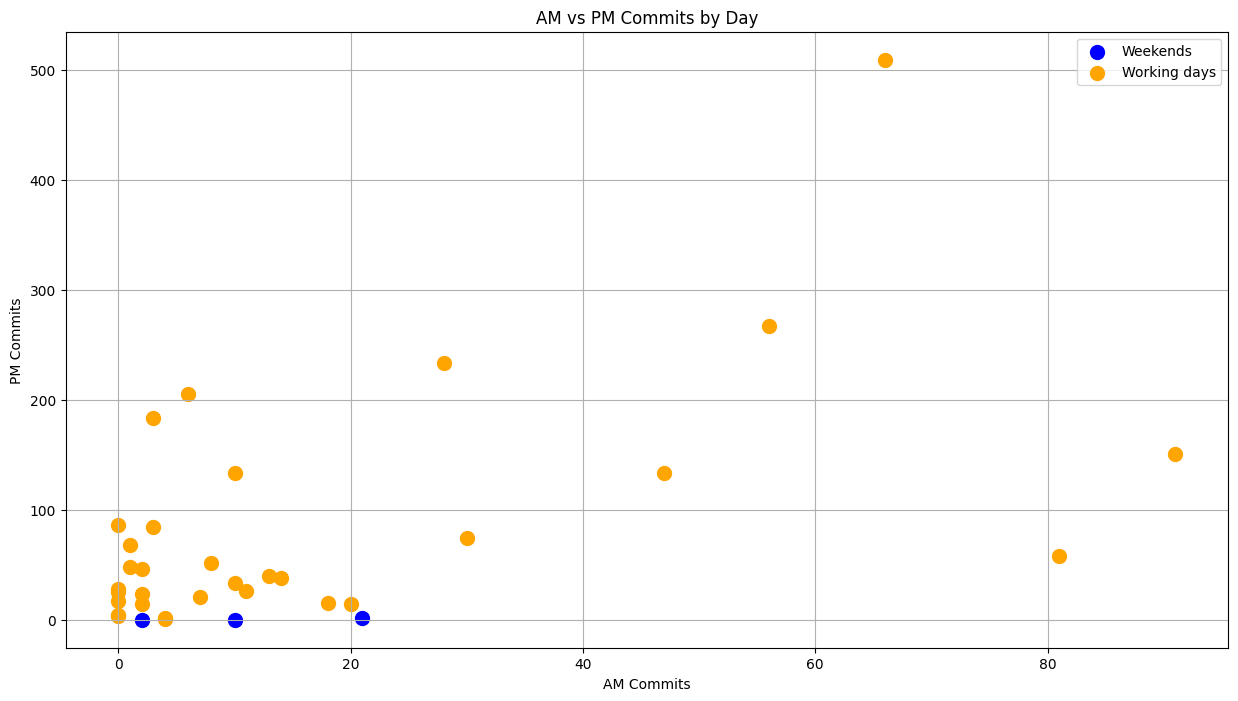

In [14]:
plt.figure(figsize=(15, 8))

plt.scatter(df[df['predict'] == 0]['am'], df[df['predict'] == 0]['pm'], color='blue', label='Weekends', s=100)
plt.scatter(df[df['predict'] == 1]['am'], df[df['predict'] == 1]['pm'], color='orange', label='Working days', s=100)

plt.title('AM vs PM Commits by Day')
plt.xlabel('AM Commits')
plt.ylabel('PM Commits')
plt.legend()
plt.grid()

plt.show()

In [ ]:
# смотря на график можно сказать что предсказания не особо хороши, модель абсолютно неправильно определила все выходные

## 4. Evaluation

- Calculate `accuracy` for your predictions.


- Calculate `accuracy` for the naive case when each of your prediction is the value of your most popular class of the day.


- Comparing the accuracies do you think that the classifier made good predictions? Put your answer in the markdown cell in the end of the secion: "yes, it is good"; "no, it is not good".

In [42]:
# accuracy для предсказаний нашей модели
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy : {accuracy:.4f}")

Accuracy : 0.6286


In [43]:
# самым популярным классом дня яляется 1 - рабочи день, что было видно из графика
most_popular_class = df['target'].mode()[0]
most_popular_class

1

In [44]:
# создаем столбец наивного случая где каждое значение самый популярный класс таргета
df['naive'] = most_popular_class
df.head(10)

,date,am,pm,target,predict,naive
0,2020-04-17,21,2,1,0,1
1,2020-04-18,1,68,0,1,1
2,2020-04-19,18,15,0,1,1
3,2020-04-20,2,23,1,1,1
4,2020-04-21,0,25,1,1,1
5,2020-04-22,0,28,1,1,1
6,2020-04-23,10,33,1,1,1
7,2020-04-24,2,14,1,1,1
8,2020-04-25,30,74,0,1,1
9,2020-04-26,28,233,0,1,1


In [45]:
# accuracy для наивного случая
accuracy_naive = accuracy_score(y, df['naive'])
print(f"Accuracy naive: {accuracy_naive:.4f}")

Accuracy naive: 0.7143


In [ ]:
# у наивного случая метрика лучше, что говорит о том что наши прогнозы плохие